# Represntatividad de estaciones de medición de contaminantes

In [17]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.metrics import mean_squared_error
from IPython.display import display, Math, Latex
import matplotlib.cm as cm

from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering

In [18]:
df = pd.read_csv("/Users/danielbustillos/Documents/CONACyT/contaminacion/Marginación_contaminación/datos_estaciones/datos_estacion_sin_madrugada.csv")

In [19]:
df.head()

,CO,NO,NO2,NOX,O3,PM10,PM2.5,PMCO,SO2,TMP,UVA,WSP,dia,fecha,hora,id_station,mes,anio
0,1.5,23.0,30.0,54.0,2.0,127.0,NaN,NaN,6.0,11.0,NaN,0.7,1,2013-01-01 01:00:00,1,ACO,1,2013
1,1.7,76.0,30.0,106.0,1.0,72.0,55.0,17.0,7.0,NaN,NaN,NaN,1,2013-01-01 01:00:00,1,CAM,1,2013
2,NaN,24.0,25.0,48.0,3.0,NaN,NaN,NaN,5.0,NaN,NaN,1.1,1,2013-01-01 01:00:00,1,CHO,1,2013
3,NaN,49.0,29.0,78.0,3.0,NaN,75.0,NaN,NaN,NaN,NaN,NaN,1,2013-01-01 01:00:00,1,COY,1,2013
4,1.4,39.0,37.0,75.0,0.0,63.0,46.0,17.0,4.0,14.5,NaN,1.0,1,2013-01-01 01:00:00,1,HGM,1,2013


Hacemos una columna de año:

In [20]:
df["anio"] = df.fecha.str[0:4]
df.anio = df.anio.astype(int)

## Veamos la distribución de los datos:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1455a72e8>,
      dtype=object)

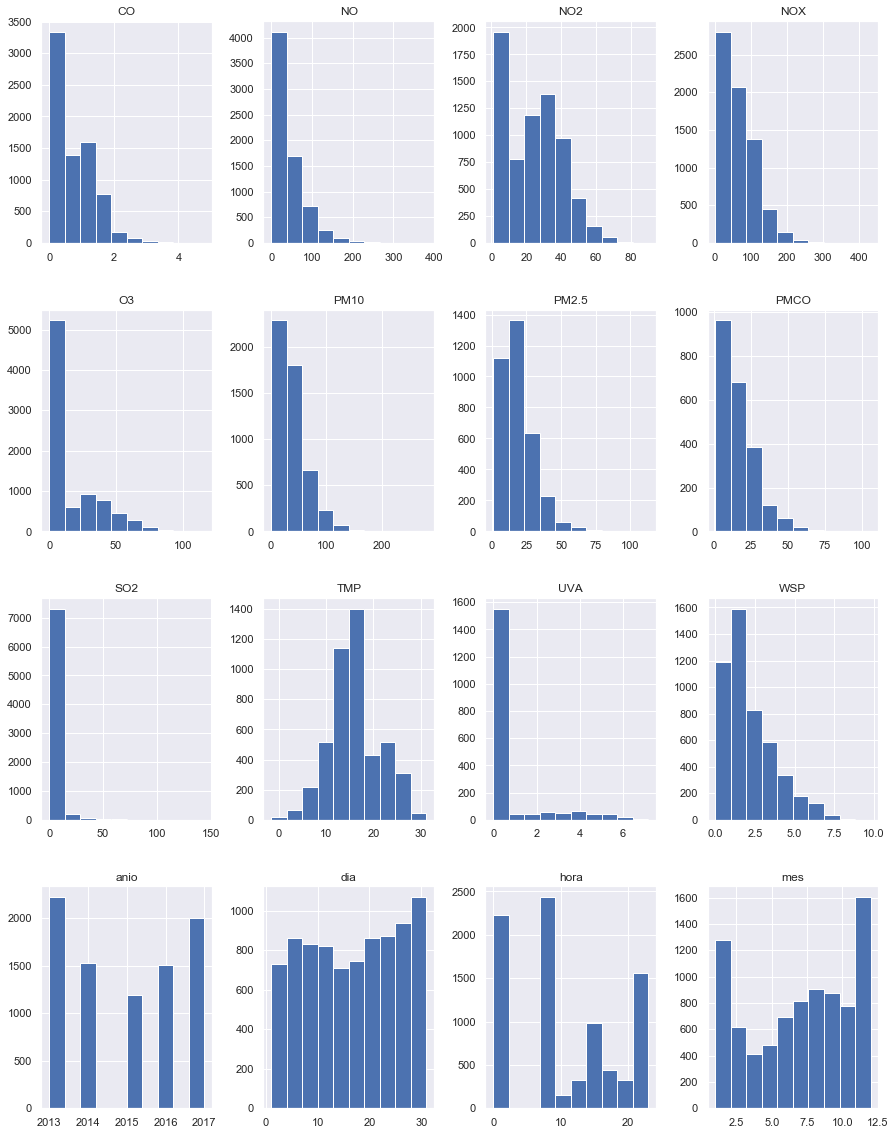

In [21]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df[(df.CO==0)|(df.O3==0)|(df.PM10==0)|(df["PM2.5"]==0)].hist(ax = ax)

## Filtremos los datos:

Usemos valores que no sean en la madrugada, en estas horas los valores se acercan a cero y arrastran el promedio de los valores por estación al mismo punto:

In [22]:
hora_madrugada = [2,3,4,5,6]

In [23]:
df = df[~df.hora.isin(hora_madrugada)]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125f63b00>,
      dtype=object)

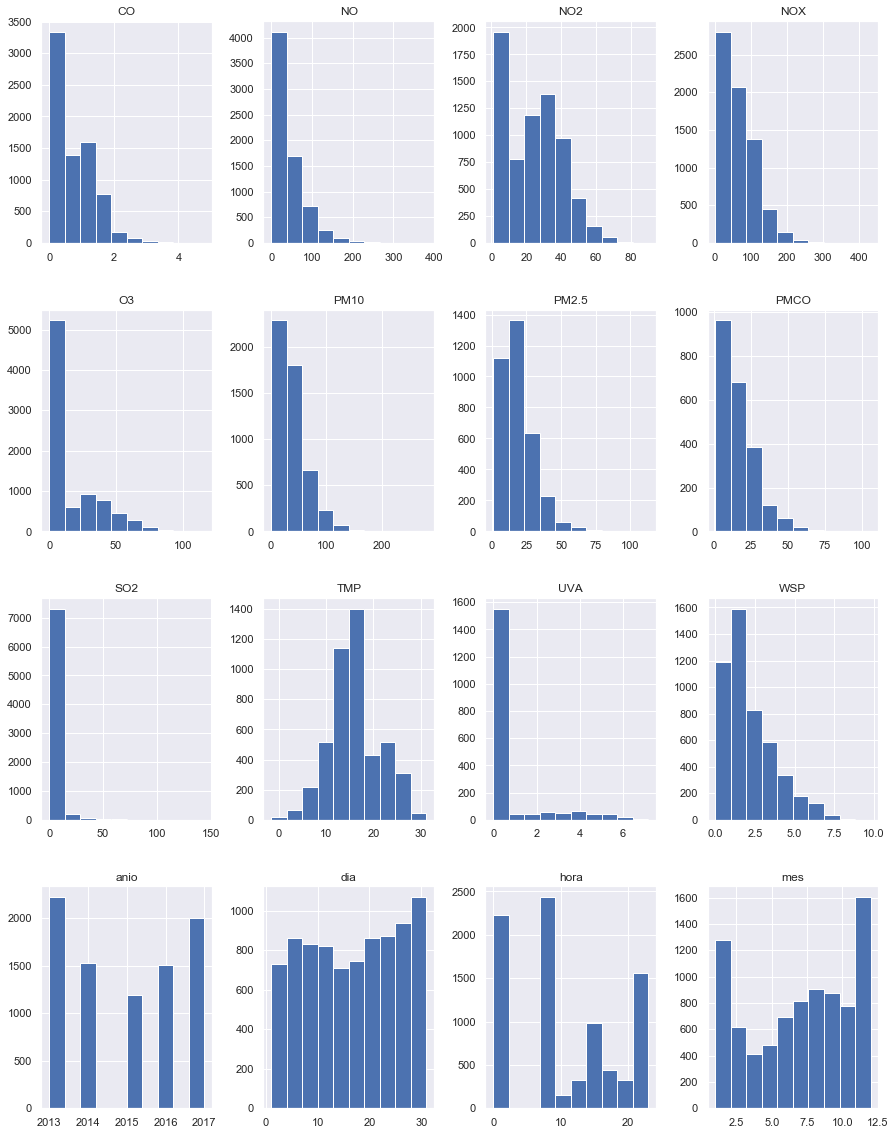

In [24]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df[(df.CO==0)|(df.O3==0)|(df.PM10==0)|(df["PM2.5"]==0)].hist(ax = ax)

### Guardemos estos Datos:

In [25]:
df.to_csv("./datos_estacion_sin_madrugada.csv",index=False)

### Leamos los archivos

In [26]:
df.head()

,CO,NO,NO2,NOX,O3,PM10,PM2.5,PMCO,SO2,TMP,UVA,WSP,dia,fecha,hora,id_station,mes,anio
0,1.5,23.0,30.0,54.0,2.0,127.0,NaN,NaN,6.0,11.0,NaN,0.7,1,2013-01-01 01:00:00,1,ACO,1,2013
1,1.7,76.0,30.0,106.0,1.0,72.0,55.0,17.0,7.0,NaN,NaN,NaN,1,2013-01-01 01:00:00,1,CAM,1,2013
2,NaN,24.0,25.0,48.0,3.0,NaN,NaN,NaN,5.0,NaN,NaN,1.1,1,2013-01-01 01:00:00,1,CHO,1,2013
3,NaN,49.0,29.0,78.0,3.0,NaN,75.0,NaN,NaN,NaN,NaN,NaN,1,2013-01-01 01:00:00,1,COY,1,2013
4,1.4,39.0,37.0,75.0,0.0,63.0,46.0,17.0,4.0,14.5,NaN,1.0,1,2013-01-01 01:00:00,1,HGM,1,2013


In [27]:
df

,CO,NO,NO2,NOX,O3,PM10,PM2.5,PMCO,SO2,TMP,UVA,WSP,dia,fecha,hora,id_station,mes,anio
0,1.5,23.0,30.0,54.0,2.0,127.0,NaN,NaN,6.0,11.0,NaN,0.7,1,2013-01-01 01:00:00,1,ACO,1,2013
1,1.7,76.0,30.0,106.0,1.0,72.0,55.0,17.0,7.0,NaN,NaN,NaN,1,2013-01-01 01:00:00,1,CAM,1,2013
2,NaN,24.0,25.0,48.0,3.0,NaN,NaN,NaN,5.0,NaN,NaN,1.1,1,2013-01-01 01:00:00,1,CHO,1,2013
3,NaN,49.0,29.0,78.0,3.0,NaN,75.0,NaN,NaN,NaN,NaN,NaN,1,2013-01-01 01:00:00,1,COY,1,2013
4,1.4,39.0,37.0,75.0,0.0,63.0,46.0,17.0,4.0,14.5,NaN,1.0,1,2013-01-01 01:00:00,1,HGM,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937790,1.4,9.0,38.0,47.0,4.0,167.0,NaN,NaN,7.0,NaN,NaN,NaN,31,2017-12-31 00:00:00,0,TLI,12,2017
937791,2.0,4.0,40.0,44.0,16.0,NaN,75.0,NaN,6.0,13.3,NaN,0.9,31,2017-12-31 00:00:00,0,UAX,12,2017
937792,1.5,10.0,54.0,64.0,4.0,NaN,NaN,NaN,6.0,14.3,NaN,1.0,31,2017-12-31 00:00:00,0,UIZ,12,2017
937793,0.7,4.0,27.0,31.0,12.0,137.0,NaN,NaN,7.0,12.8,NaN,1.7,31,2017-12-31 00:00:00,0,VIF,12,2017


Hagamos una tabla pivote con los promedios del PM10 por estación:

In [28]:
df_pivot = pd.pivot_table(df, index=['fecha'],values=["PM10"],columns=["id_station"], aggfunc='mean').reset_index(drop=False)
df_pivot.columns = df_pivot.columns.droplevel()
df_pivot.rename(columns={'': 'fecha'}, inplace=True)

In [29]:
df_pivot.head()

id_station,fecha,ACO,AJM,ATI,BJU,CAM,CHO,CUA,CUT,FAC,...,PED,SAG,SFE,SUR,TAH,TLA,TLI,UIZ,VIF,XAL
0,2013-01-01 00:00:00,30.0,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,...,NaN,NaN,13.0,41.0,22.0,44.0,39.0,37.0,NaN,48.0
1,2013-01-01 01:00:00,127.0,NaN,NaN,NaN,72.0,NaN,NaN,NaN,NaN,...,64.0,NaN,20.0,127.0,168.0,69.0,148.0,116.0,NaN,167.0
2,2013-01-01 07:00:00,136.0,NaN,NaN,NaN,109.0,NaN,NaN,NaN,NaN,...,42.0,NaN,7.0,151.0,102.0,73.0,342.0,139.0,NaN,222.0
3,2013-01-01 08:00:00,87.0,NaN,NaN,NaN,127.0,NaN,NaN,NaN,NaN,...,11.0,NaN,17.0,143.0,58.0,165.0,307.0,154.0,NaN,334.0
4,2013-01-01 09:00:00,66.0,NaN,NaN,NaN,154.0,NaN,NaN,NaN,NaN,...,55.0,NaN,12.0,124.0,75.0,212.0,344.0,15.0,NaN,337.0


### Guardemos las columnas en una lista:

In [30]:
columns =  df_pivot.columns[1:].tolist()

In [31]:
columnas_fecha =  df_pivot.columns.tolist()
df_grafica = df_pivot[[columnas_fecha[0],columnas_fecha[1],columnas_fecha[2]]].dropna(subset=[columnas_fecha[1],columnas_fecha[2]])[[columnas_fecha[0],columnas_fecha[1],columnas_fecha[2]]]

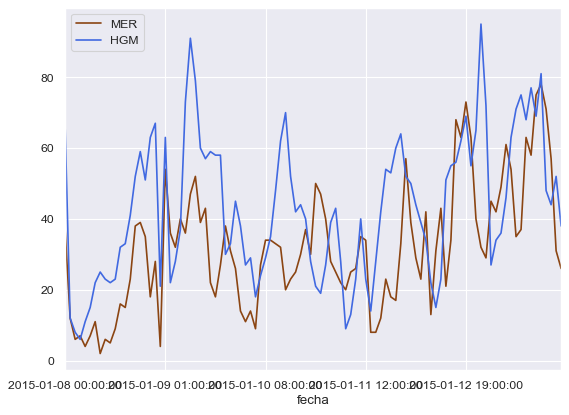

In [32]:
fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='w')
ax = fig.gca()

df_grafica.head(100).plot(x="fecha", y=[columnas_fecha[1]],ax=ax,label=["MER"],color="saddlebrown")
df_grafica.head(100).plot(x="fecha", y=[columnas_fecha[2]],ax=ax,label=["HGM"],color='royalblue')

plt.legend()
plt.show()

### Definimos una función para que nos de el RSME de dos columnas

La función nos devuelve un número que nos indica el que tanto se parecen dos series de tiempo:


$$RSME=\sqrt{\frac{1}{n}\sum_{i=1}^n(\hat{Y_i} - Y_i)^2}
$$

In [33]:
def MSE_funcion(i,j,df):   
    if not df[[columns[i],columns[j]]].dropna(subset=[columns[i],columns[j]])[[columns[j]]
                                                                             ].empty & df[[columns[i],columns[j]]
                                                                                         ].dropna(subset=[columns[i],columns[j]]
                                                                                                 )[[columns[i]]].empty: #
        # vemos que las dos estaciones miden el contaminante
        MSE = mean_squared_error(df[[columns[i],columns[j]]].dropna(subset=[columns[i],columns[j]])[[columns[i]]],
                                  df[[columns[i],columns[j]]].dropna(subset=[columns[i],columns[j]])[[columns[j]]])
        #con el dropna nos aseguramos que las dos estaciones miden el contaminante a la misma hora
        return np.sqrt(MSE)
    else:
        return .099 

Definimos un dataframe vacío:

In [34]:
df_SME = pd.DataFrame(index = columns,columns=columns)

Ejecutamos la función:

In [35]:
for fila in range(len(df_pivot.drop("fecha",axis=1).columns)):
    for columna in range(len(df_pivot.drop("fecha",axis=1).columns)):
        df_SME.iloc[fila,columna] = MSE_funcion(fila,columna,df_pivot.drop("fecha",axis=1))
df_SME = df_SME.fillna(0.099)

In [36]:
df_SME.head()

,ACO,AJM,ATI,BJU,CAM,CHO,CUA,CUT,FAC,HGM,...,PED,SAG,SFE,SUR,TAH,TLA,TLI,UIZ,VIF,XAL
ACO,0.000000,28.027448,28.685264,26.564863,29.971697,38.711040,27.257759,41.054857,28.240792,28.329463,...,27.585518,27.162166,28.338475,26.268517,29.699018,33.119997,32.322758,27.999480,39.072606,48.882301
AJM,28.027448,0.000000,26.645784,19.271891,28.369701,39.277557,14.654107,47.210811,27.148765,21.249135,...,13.711817,33.782886,14.674835,19.341905,27.055937,32.692946,38.283464,25.969664,44.780581,58.315612
ATI,28.685264,26.645784,0.000000,23.042541,25.258024,35.358910,29.062098,34.147790,21.510883,26.246123,...,28.494304,28.282947,28.820376,30.018899,30.906113,25.082820,25.501580,27.599960,34.458624,41.220217
BJU,26.564863,19.271891,23.042541,0.000000,21.266427,35.701596,22.042193,40.703427,25.072092,12.287330,...,13.147885,27.094015,17.879764,0.099000,26.311917,25.905518,31.339410,19.656756,37.840715,48.024347
CAM,29.971697,28.369701,25.258024,21.266427,0.000000,34.023684,28.392010,37.097785,23.776069,19.477276,...,21.229195,24.013579,25.596429,27.161667,29.673820,19.210469,27.903477,19.903485,37.278934,35.591300


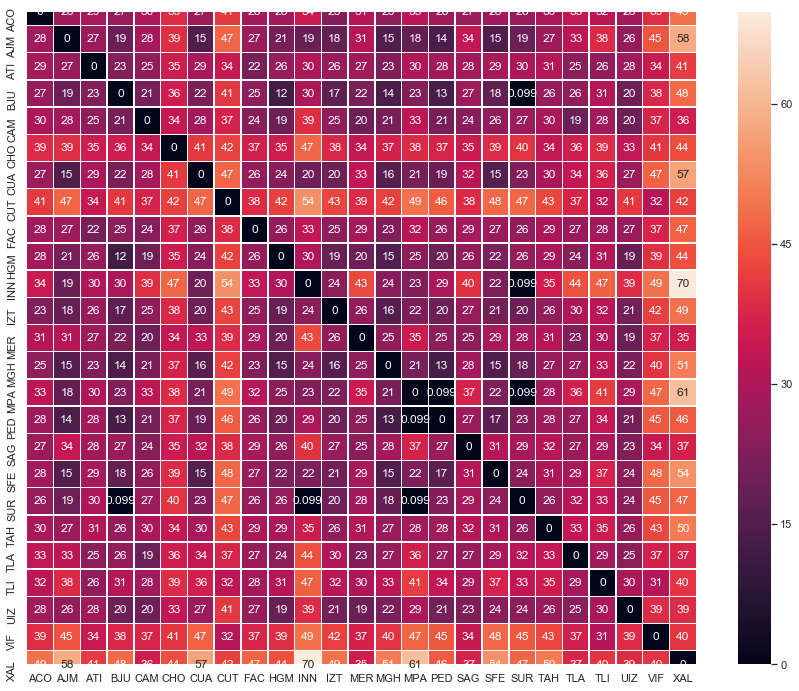

In [37]:
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(df_SME, annot=True, linewidths=.5, ax=ax)

Los más parecidos:

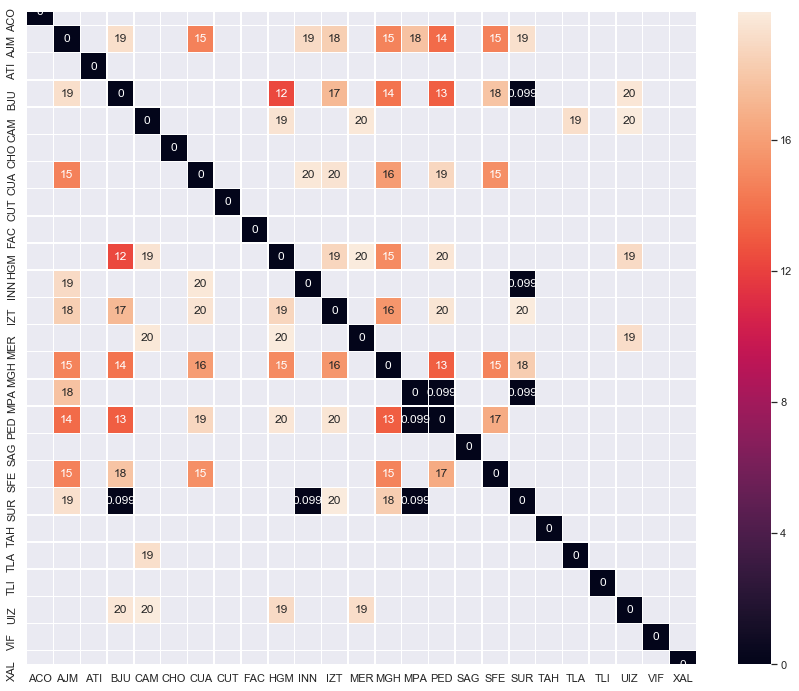

In [38]:
df_cercanos = df_SME[df_SME < 20]
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(df_cercanos, annot=True, linewidths=.5, ax=ax)

Los menos parecidos:

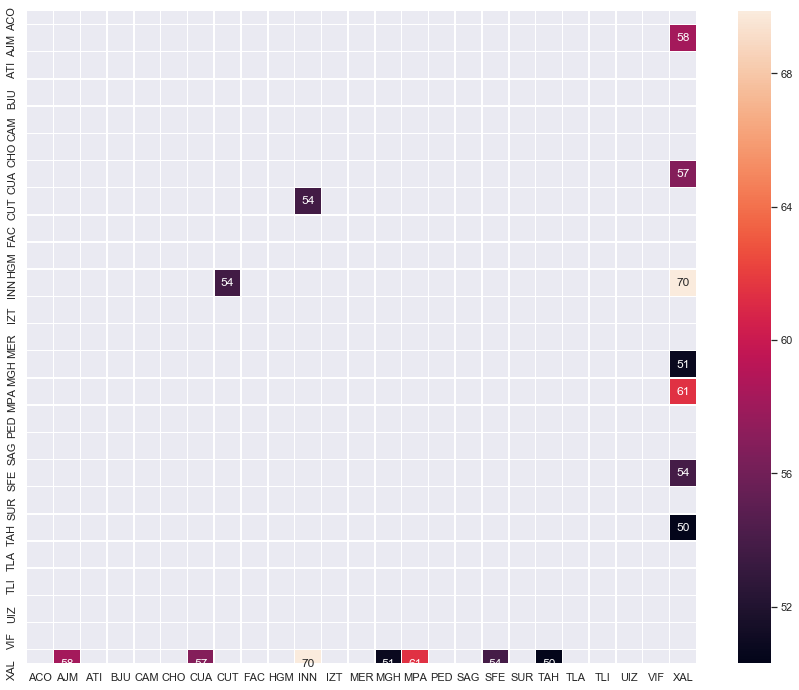

In [39]:
df_cercanos = df_SME[df_SME >50]
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(df_cercanos, annot=True, linewidths=.5, ax=ax)

## Leamos el archivo de distancia de estaciones:

In [40]:
df_distancia = pd.read_csv("/Users/danielbustillos/Documents/CONACyT/Marginación_contaminación/datos_estaciones/distancia_estaciones.csv")
df_distancia = df_distancia.fillna(0.099)
df_distancia.set_index("ID",inplace=True)
df_distancia = df_distancia /1000 #convertimos a Km

FileNotFoundError: [Errno 2] File b'/Users/danielbustillos/Documents/CONACyT/Marginacio\xcc\x81n_contaminacio\xcc\x81n/datos_estaciones/distancia_estaciones.csv' does not exist: b'/Users/danielbustillos/Documents/CONACyT/Marginacio\xcc\x81n_contaminacio\xcc\x81n/datos_estaciones/distancia_estaciones.csv'

In [ ]:
df_distancia.head()

In [ ]:
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(df_distancia, annot=True, linewidths=.5, ax=ax)

In [ ]:
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(df_distancia[df_distancia<2], annot=True, linewidths=.1, ax=ax)

### Grafiquemos las estaciones:

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns

In [ ]:
estaciones = gpd.GeoDataFrame.from_file("/Users/danielbustillos/Documents/CONACyT/Marginación_contaminación/SIG/estaciones_matrix/estaciones_ubicacion.shp")
alcaldias = gpd.GeoDataFrame.from_file("/Users/danielbustillos/Documents/CONACyT/Marginación_contaminación/SIG/alcaldias/alcaldias.shp")

In [ ]:
f, ax = plt.subplots(1, figsize=(12,12))
alcaldias.plot(ax=ax, scheme = "fisher_jenks")
estaciones.plot(ax=ax,color="k")

## RSME

In [ ]:
df_distancia = df_distancia.loc[columns,columns]

In [ ]:
df_SME = df_SME.loc[columns,columns]

In [ ]:
df_SME.head()

In [ ]:
df_distancia.columns = [df_distancia.columns.tolist()[cont]+"_dist" for cont in range(len(df_distancia))]
del df_distancia.index.name
df_distancia.head()

In [ ]:
df_SME_triang = pd.DataFrame(pd.np.triu(df_SME.values),index=columns,columns=columns)
df_distancia_triang= pd.DataFrame(pd.np.triu(df_distancia.values),index=columns,columns=columns)

In [ ]:
from sklearn import preprocessing
x = df_distancia_triang.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_distancia_triang_plot = pd.DataFrame(x_scaled)

## Triangular matrix scaled

In [ ]:
df_distancia_triang_plot.columns = columns
df_distancia_triang_plot.index = columns

Definimos los tamaños:

In [ ]:
sizes = [(df_distancia_triang_plot.loc[fila,"HGM"]*12)*(df_distancia_triang_plot.loc[fila,"HGM"]*6)
         for fila in df_distancia_triang_plot]

In [ ]:
df_SME.columns

In [ ]:
fig = plt.figure(figsize=(6, 4), dpi=400, facecolor="w")
ax = fig.gca()
import itertools
 
lista_markers = [ 
    "o","o","o","o","o","o","o","o","p","p","p","p","p","p","p","p","p","p","p","v","v","v","v","v","v","v","v"]

estacion_blanco='CUA'
[plt.scatter(df_SME_triang[df_SME_triang != 0][cont],
             df_distancia_triang[df_distancia_triang != 0][cont] #sust x cont
,alpha=0.6,marker=m,
             s=sizes)for cont,m in zip(
    df_SME.columns,lista_markers)]




plt.ylabel("Distancia[KM]")
plt.xlabel("RSME")
plt.title("RSME vs Distancia")
plt.legend(fontsize="small")


l1 = plt.scatter([],[], s=1, edgecolors='none')
l2 = plt.scatter([],[], s=5, edgecolors='none')
l3 = plt.scatter([],[], s=10, edgecolors='none')
l4 = plt.scatter([],[], s=30, edgecolors='none')

labels = ["5", "10", "20", "50"]

#plt.

# Add first legend:  only labeled data is included
leg1 = ax.legend([l1, l2, l3, l4], labels, ncol=2
                 , frameon=True,
handlelength=1, loc = 2, borderpad = 0.8,
handletextpad=1, title='Distancia-centro', scatterpoints = 1,fontsize=9,facecolor="white")

leg2 = ax.legend(ncol=2,fontsize=5,loc=1,facecolor="white")
ax.add_artist(leg1)

ax.grid(color='gray', linestyle='--', linewidth=0.2)
ax.patch.set_facecolor('white')
plt.show()

In [ ]:
fig = plt.figure(figsize=(6, 4), dpi=400, facecolor="w")
ax = fig.gca()
import itertools
 
lista_markers = [ 
    "o","o","o","o","o","o","o","o","p","p","p","p","p","p","p","p","p","p","p","v","v","v","v","v","v","v","v"]

estacion_blanco='CUA'
[plt.scatter(df_SME_triang[df_SME_triang != 0][cont],
             df_distancia_triang[df_distancia_triang != 0][cont] #sust x cont
,alpha=0.6,marker=m,
             s=sizes)for cont,m in zip(
    df_SME.columns,lista_markers)]




plt.ylabel("Distancia[KM]")
plt.xlabel("RSME")
plt.title("RSME vs Distancia")
plt.legend(fontsize="small")


l1 = plt.scatter([],[], s=1, edgecolors='none')
l2 = plt.scatter([],[], s=5, edgecolors='none')
l3 = plt.scatter([],[], s=10, edgecolors='none')
l4 = plt.scatter([],[], s=30, edgecolors='none')

labels = ["5", "10", "20", "50"]


#plt.

# Add first legend:  only labeled data is included
leg1 = ax.legend([l1, l2, l3, l4], labels, ncol=2
                 , frameon=True,
handlelength=1, loc = 2, borderpad = 0.8,
handletextpad=1, title='Distancia-centro', scatterpoints = 1,fontsize=9,facecolor="white")

leg2 = ax.legend(ncol=2,fontsize=5,loc=1,facecolor="white")
ax.add_artist(leg1)

ax.grid(color='gray', linestyle='--', linewidth=0.2)
ax.patch.set_facecolor('white')
plt.show()

## Distribución de valores:

In [ ]:
distancia_melt = pd.melt(df_distancia.reset_index(), id_vars=['index'], value_vars=df_distancia.columns.tolist(),
       var_name='estacion', value_name='distancia').sort_values(by=['index', 'estacion']
                                                               ).rename(columns={'index': 'estacion_dist'})

rsme_melt = pd.melt(df_SME.reset_index(), id_vars=['index'], value_vars=df_SME.columns.to_list(),
       var_name='estacion1', value_name='RSME').sort_values(by=['index', 'estacion1']
                                                           ).rename(columns={'index': 'estacion0'})

In [ ]:
df_melted = pd.concat([rsme_melt, distancia_melt], axis=1, sort=True)[["estacion0","estacion1","distancia","RSME"]]

Hagamos bins de distancia:

In [ ]:
df_melted.loc[((df_melted.distancia >= 0)) , 'distancia_bin'] = 'nan'
df_melted.loc[((df_melted.distancia >= 0) & (df_melted.distancia < 5)) , 'distancia_bin'] = '[0,5]'
df_melted.loc[((df_melted.distancia >= 5) & (df_melted.distancia < 10)) , 'distancia_bin'] = '[5,10]'
df_melted.loc[((df_melted.distancia >= 10) & (df_melted.distancia < 20)) , 'distancia_bin'] = '[10,20]'
df_melted.loc[((df_melted.distancia >= 20) & (df_melted.distancia < 40)) , 'distancia_bin'] = '[20,40]'
df_melted.loc[((df_melted.distancia >= 40) & (df_melted.distancia < 100)) , 'distancia_bin'] = '[40,100]'
df_melted.sort_values(by=['distancia_bin'],inplace=True)

In [ ]:
plt.figure(figsize=(16, 6))
ax = sns.violinplot(x="distancia_bin", y="RSME", data=df_melted)

Hagamos bins de RSME:

In [ ]:
df_melted.loc[((df_melted.RSME >= 0)) , 'RSME_bin'] = 'nan'
df_melted.loc[((df_melted.RSME >= 0) & (df_melted.RSME < 5)) , 'RSME_bin'] = '[0,5]'
df_melted.loc[((df_melted.RSME >= 5) & (df_melted.RSME < 10)) , 'RSME_bin'] = '[5,10]'
df_melted.loc[((df_melted.RSME >= 10) & (df_melted.RSME < 20)) , 'RSME_bin'] = '[10,20]'
df_melted.loc[((df_melted.RSME >= 20) & (df_melted.RSME < 40)) , 'RSME_bin'] = '[20,40]'
df_melted.loc[((df_melted.RSME >= 40) & (df_melted.RSME < 100)) , 'RSME_bin'] = '[40,100]'
df_melted.sort_values(by=['RSME_bin'],inplace=True)

In [ ]:
plt.figure(figsize=(16, 6))
ax = sns.violinplot(x="RSME_bin", y="distancia", data=df_melted)

In [ ]:
sns.set_style('ticks')
fig, ax = plt.subplots()

fig.set_size_inches(22.7, 8.27)

ax = sns.swarmplot(x="distancia_bin", y="RSME", data=df_melted,
                   color="black", edgecolor="white",order=[ "[0,5]", "[5,10]", "[10,20]","[20,40]","[40,100]"])
ax = sns.violinplot(x="distancia_bin", y="RSME", data=df_melted,order=[ "[0,5]", "[5,10]", "[10,20]","[20,40]","[40,100]"])



In [ ]:
df_melted.distancia.hist()

In [ ]:
df_melted.RSME.hist()

In [ ]:
with sns.axes_style("white"):
    sns.jointplot(x="distancia", y="RSME",data=df_melted[(df_melted[['distancia', 'RSME']]!=0)], kind="kde");
    sns.jointplot(x="distancia", y="RSME",data=df_melted[(df_melted[['distancia', 'RSME']]!=0)], kind="hex");

In [ ]:
g = sns.jointplot(x="distancia", y="RSME",data=df_melted[(df_melted[['distancia', 'RSME']]!=0)], kind="kde")
g.plot_joint(plt.scatter, c="r", s=30, linewidth=0.1, marker=".")
g.ax_joint.collections[0].set_alpha(0)

In [ ]:
pred = model.predict(X_test)